# Comparing HNL distributions with the Dark nus one (using no_scan)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from parameters_dict import physics_parameters
from exp_analysis_class import exp_analysis
from plot_utils import *
from dark_nus_utils import *
from fourvec import *
from const import *

0.0009866349020787781


## Get objects for all 4 cases 

In [5]:
produce_samples_without_scanning_m4mz(case='light', D_or_M='majorana',  m4mz=[0.15,0.03])
produce_samples_without_scanning_m4mz(case='heavy', D_or_M='majorana',  m4mz=[0.15,1.25])

Generating events for m4=0.15 GeV and mzprime=0.03

Traceback (most recent call last):
  File "/Users/matheushostert/Repos/nicgen/dark_gen.py", line 2, in <module>
    import matplotlib
ModuleNotFoundError: No module named 'matplotlib'

Generating events for m4=0.15 GeV and mzprime=1.25

Traceback (most recent call last):
  File "/Users/matheushostert/Repos/nicgen/dark_gen.py", line 2, in <module>
    import matplotlib
ModuleNotFoundError: No module named 'matplotlib'



In [3]:
heavy_file = 'm4_0.15_mzprime_1.25_heavy_majorana'
light_file = 'm4_0.15_mzprime_1.25_heavy_majorana'


heavy_exp_analyis = exp_analysis('heavy', 'majorana')
light_exp_analyis = exp_analysis('light', 'majorana')

heavy_exp_analyis.load_df(0.15,1.25)
light_exp_analyis.load_df(0.15,0.03)

loading df 0.15, 1.25
initialising df 0.15, 1.25
loading df 0.15, 0.03
initialising df 0.15, 0.03


In [4]:
df_std = pd.read_pickle(f'../standardHNL/data/MC_std_HNL_NCdecay_m4_0.15.pckl')

In [5]:
# compute useful variables
for df in [df_std]:
    for comp in ['t','x','y','z']:
        df['pee', comp] = df['plm', comp] + df['plp', comp]
        df['pdark', comp] = df['plm', comp] + df['plp', comp] + df['pnu', comp]
    df['recoil_mass', ''] = inv_mass(df['pHad']).round(6)
    df['ee_mass', ''] = inv_mass(df['pee'])
    df['ee_costheta', ''] = costheta(df['plm'], df['plp'])
    df['ee_beam_costheta', ''] = df['pee', 'z']/np.sqrt(dot3_df(df['pee'], df['pee']))
    df['ee_momentum', ''] = np.sqrt(dot3_df(df['pee'], df['pee']))
    df['experimental_t', ''] = (df['plm','t'] - df['plm','z'] + df['plp','t'] - df['plp','z'])**2 +\
                                   df['plm','x']**2 + df['plm','y']**2 + df['plp','x']**2 + df['plp','y']**2
    
wstd=df_std['weight', '']/np.sum(df_std['weight', ''])


In [6]:
m4mz=(0.15,0.03)
no_scan_light = light_exp_analyis.dfs[m4mz]
actual_weights_light = no_scan_light.query('no_cuts')['actual_weight']

In [7]:
m4mz=(0.15,1.25)
no_scan_heavy = heavy_exp_analyis.dfs[m4mz]
actual_weights_heavy = no_scan_heavy.query('no_cuts')['actual_weight']


# Energies

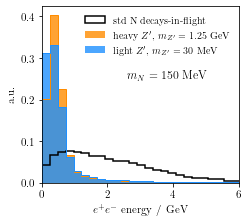

In [100]:
fsize = 11
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(3.5,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

bins = np.linspace(0,7,30)

w_heavy = actual_weights_heavy/np.sum(actual_weights_heavy)
w_light = actual_weights_light/np.sum(actual_weights_light)

out = ax.hist(df_std['ee_momentum', ''],
               bins=bins, 
#                range=(0.5, 1),
               weights=wstd, 
               label='std N decays-in-flight',
                facecolor='dodgerblue',
              edgecolor='black',
               histtype='step',
             lw=1.5)


out = ax.hist(no_scan_heavy['ee_energy'],
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
               label='heavy $Z^\prime$, $m_{Z^\prime} = 1.25$ GeV',
                facecolor='darkorange',
              alpha = 0.8, lw=0,
              edgecolor='darkorange',
               histtype='bar',
             ls = '-')
out = ax.hist(no_scan_heavy['ee_energy'],
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
                facecolor='darkorange',
              alpha = 1, lw=1.,
              edgecolor='darkorange',
               histtype='step',
             ls = '-')

#################

out = ax.hist(no_scan_light['ee_energy'],
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
               label='light $Z^\prime$, $m_{Z^\prime} = 30$ MeV',
              facecolor='dodgerblue',
              alpha = 0.8, lw= 0, 
              edgecolor='dodgerblue',
               histtype='bar',
             ls='-')
out = ax.hist(no_scan_light['ee_energy'],
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
              facecolor='dodgerblue',
              alpha = 1, lw= 1., 
              edgecolor='dodgerblue',
               histtype='step',
             ls='-')

ax.annotate(r"$m_N = 150$ MeV", xy=(2.6, 0.25), fontsize=12, color="black", rotation_mode='anchor')

ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"$e^+e^-$ energy / GeV")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.0,6.0)
ax.patch.set_visible(False)
plt.savefig("paper_plots/energies.png", dpi=400)



# Energy asymmetry

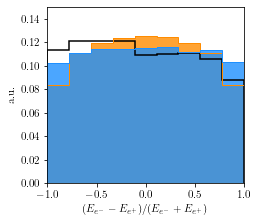

In [104]:
fsize = 11
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(3.5,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

bins = np.linspace(-1,1,10)

w_heavy = actual_weights_heavy/np.sum(actual_weights_heavy)
w_light = actual_weights_light/np.sum(actual_weights_light)

def e_asy(df):
    return (df['plm', 't']-df['plp', 't'])/(df['plp', 't']+df['plm', 't'])
out = ax.hist(e_asy(df_std),
               bins=bins, 
#                range=(0.5, 1),
               weights=wstd, 
               label='std N decays-in-flight',
                facecolor='dodgerblue',
              edgecolor='black',
               histtype='step',
             lw=1.5)


out = ax.hist(no_scan_heavy['ee_energy_asymetry'],
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
               label='heavy $Z^\prime$, $m_{Z^\prime} = 1.25$ GeV',
                facecolor='darkorange',
              alpha = 0.8, lw=0,
              edgecolor='darkorange',
               histtype='bar',
             ls = '-')
out = ax.hist(no_scan_heavy['ee_energy_asymetry'],
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
                facecolor='darkorange',
              alpha = 1, lw=1.,
              edgecolor='darkorange',
               histtype='step',
             ls = '-')

#################

out = ax.hist(no_scan_light['ee_energy_asymetry'],
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
               label='light $Z^\prime$, $m_{Z^\prime} = 30$ MeV',
              facecolor='dodgerblue',
              alpha = 0.8, lw= 0, 
              edgecolor='dodgerblue',
               histtype='bar',
             ls='-')
out = ax.hist(no_scan_light['ee_energy_asymetry'],
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
              facecolor='dodgerblue',
              alpha = 1, lw= 1., 
              edgecolor='dodgerblue',
               histtype='step',
             ls='-')

# ax.annotate(r"$m_N = 150$ MeV", xy=(0.5, 0.2), fontsize=12, color="black", rotation_mode='anchor')
# ax.legend(loc='upper right',frameon=False)

ax.set_xlabel(r"$(E_{e^-} - E_{e^+})/(E_{e^-} + E_{e^+})$")
ax.set_ylabel(r"a.u.")
ax.set_xlim(-1,1)
ax.set_ylim(0,0.15)
ax.patch.set_visible(False)
plt.savefig("paper_plots/energy_asymmetry.png", dpi=400)



# opening angle

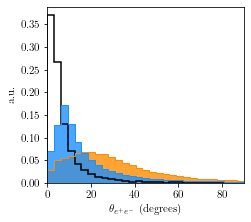

In [108]:
fsize = 11
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(3.5,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

bins = np.linspace(0,90,30)

w_heavy = actual_weights_heavy/np.sum(actual_weights_heavy)
w_light = actual_weights_light/np.sum(actual_weights_light)

out = ax.hist(np.arccos(df_std['ee_costheta', ''])*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=wstd, 
               label='std N decays-in-flight',
                facecolor='dodgerblue',
              edgecolor='black',
               histtype='step',
             lw=1.5)


out = ax.hist(no_scan_heavy['ee_theta']*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
               label='heavy $Z^\prime$, $m_{Z^\prime} = 1.25$ GeV',
                facecolor='darkorange',
              alpha = 0.8, lw=0,
              edgecolor='darkorange',
               histtype='bar',
             ls = '-')
out = ax.hist(no_scan_heavy['ee_theta']*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
                facecolor='darkorange',
              alpha = 1, lw=1.,
              edgecolor='darkorange',
               histtype='step',
             ls = '-')

#################

out = ax.hist(no_scan_light['ee_theta']*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
               label='light $Z^\prime$, $m_{Z^\prime} = 30$ MeV',
              facecolor='dodgerblue',
              alpha = 0.8, lw= 0, 
              edgecolor='dodgerblue',
               histtype='bar',
             ls='-')
out = ax.hist(no_scan_light['ee_theta']*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
              facecolor='dodgerblue',
              alpha = 1, lw= 1., 
              edgecolor='dodgerblue',
               histtype='step',
             ls='-')

# ax.annotate(r"$m_N = 150$ MeV", xy=(50, 0.3), fontsize=12, color="black", rotation_mode='anchor')
# ax.legend(loc='upper right',frameon=False)

ax.set_xlabel(r"$\theta_{e^+e^-}$ (degrees)")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.0,90)
ax.patch.set_visible(False)
plt.savefig("paper_plots/opening_angles.png", dpi=400)

# Angle wrt the beam

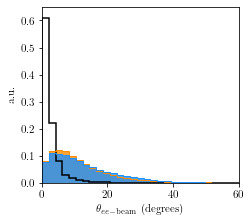

In [119]:
fsize = 11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(3.5,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(rcparams)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

bins = np.linspace(0,60,30)

w_heavy = actual_weights_heavy/np.sum(actual_weights_heavy)
w_light = actual_weights_light/np.sum(actual_weights_light)

out = ax.hist(np.arccos(df_std['ee_beam_costheta', ''])*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=wstd, 
               label='std N decays-in-flight',
                facecolor='dodgerblue',
              edgecolor='black',
               histtype='step',
             lw=1.5)


out = ax.hist(np.arccos(no_scan_heavy['ee_beam_costheta'])*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
               label='heavy $Z^\prime$, $m_{Z^\prime} = 1.25$ GeV',
                facecolor='darkorange',
              alpha = 0.8, lw=0,
              edgecolor='darkorange',
               histtype='bar',
             ls = '-')
out = ax.hist(np.arccos(no_scan_heavy['ee_beam_costheta'])*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
                facecolor='darkorange',
              alpha = 1, lw=1.,
              edgecolor='darkorange',
               histtype='step',
             ls = '-')

#################

out = ax.hist(np.arccos(no_scan_light['ee_beam_costheta'])*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
               label='light $Z^\prime$, $m_{Z^\prime} = 30$ MeV',
              facecolor='dodgerblue',
              alpha = 0.8, lw= 0, 
              edgecolor='dodgerblue',
               histtype='bar',
             ls='-')
out = ax.hist(np.arccos(no_scan_light['ee_beam_costheta'])*rad_to_deg,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
              facecolor='dodgerblue',
              alpha = 1, lw= 1., 
              edgecolor='dodgerblue',
               histtype='step',
             ls='-')

# ax.annotate(r"$m_N = 150$ MeV", xy=(20, 0.35), fontsize=12, color="black", rotation_mode='anchor')
# ax.legend(loc='upper right',frameon=False)

ax.set_xlabel(r"$\theta_{ee-{\rm beam}}$ (degrees)")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.0,60)
ax.set_ylim(0.0,0.65)
ax.patch.set_visible(False)
plt.savefig("paper_plots/beam_angle.png", dpi=400)

# experimental t

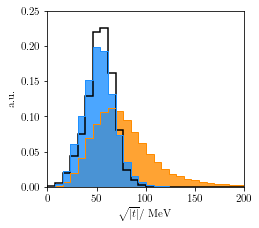

In [122]:
fsize = 11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(3.5,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(rcparams)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

bins = np.linspace(0,np.sqrt(0.05)*1e3,30)

w_heavy = actual_weights_heavy/np.sum(actual_weights_heavy)
w_light = actual_weights_light/np.sum(actual_weights_light)

out = ax.hist(np.sqrt(df_std['experimental_t', ''])*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=wstd, 
               label='std N decays-in-flight',
                facecolor='dodgerblue',
              edgecolor='black',
               histtype='step',
             lw=1.5)


out = ax.hist(np.sqrt(no_scan_heavy['experimental_t'])*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
               label='heavy $Z^\prime$, $m_{Z^\prime} = 1.25$ GeV',
                facecolor='darkorange',
              alpha = 0.8, lw=0,
              edgecolor='darkorange',
               histtype='bar',
             ls = '-')
out = ax.hist(np.sqrt(no_scan_heavy['experimental_t'])*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
                facecolor='darkorange',
              alpha = 1, lw=1.,
              edgecolor='darkorange',
               histtype='step',
             ls = '-')

#################

out = ax.hist(np.sqrt(no_scan_light['experimental_t'])*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
               label='light $Z^\prime$, $m_{Z^\prime} = 30$ MeV',
              facecolor='dodgerblue',
              alpha = 0.8, lw= 0, 
              edgecolor='dodgerblue',
               histtype='bar',
             ls='-')
out = ax.hist(np.sqrt(no_scan_light['experimental_t'])*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
              facecolor='dodgerblue',
              alpha = 1, lw= 1., 
              edgecolor='dodgerblue',
               histtype='step',
             ls='-')

# ax.annotate(r"$m_N = 150$ MeV", xy=(100, 0.2), fontsize=12, color="black", rotation_mode='anchor')
# ax.legend(loc='upper right',frameon=False)

ax.set_xlabel(r"$\sqrt{|t|}/$ MeV")
ax.set_ylabel(r"a.u.") 
ax.set_xlim(0.0,200)
ax.set_ylim(0.0,0.25)
ax.patch.set_visible(False)
plt.savefig("paper_plots/experimental_t.png", dpi=400)

# invariant mass

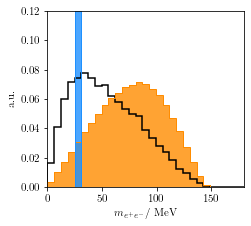

In [126]:
fsize = 11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(3.5,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(rcparams)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

bins = np.linspace(0,180,30)

w_heavy = actual_weights_heavy/np.sum(actual_weights_heavy)
w_light = actual_weights_light/np.sum(actual_weights_light)

out = ax.hist(df_std['ee_mass', '']*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=wstd, 
               label='std N decays-in-flight',
                facecolor='dodgerblue',
              edgecolor='black',
               histtype='step',
             lw=1.5)


out = ax.hist(no_scan_heavy['ee_mass']*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
               label='heavy $Z^\prime$, $m_{Z^\prime} = 1.25$ GeV',
                facecolor='darkorange',
              alpha = 0.8, lw=0,
              edgecolor='darkorange',
               histtype='bar',
             ls = '-')
out = ax.hist(no_scan_heavy['ee_mass']*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_heavy, 
                facecolor='darkorange',
              alpha = 1, lw=1.,
              edgecolor='darkorange',
               histtype='step',
             ls = '-')

#################

out = ax.hist(no_scan_light['ee_mass']*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
               label='light $Z^\prime$, $m_{Z^\prime} = 30$ MeV',
              facecolor='dodgerblue',
              alpha = 0.8, lw= 0, 
              edgecolor='dodgerblue',
               histtype='bar',
             ls='-')
out = ax.hist(no_scan_light['ee_mass']*1e3,
               bins=bins, 
#                range=(0.5, 1),
               weights=w_light, 
              facecolor='dodgerblue',
              alpha = 1, lw= 1., 
              edgecolor='dodgerblue',
               histtype='step',
             ls='-')

# ax.annotate(r"$m_N = 150$ MeV", xy=(100, 0.2), fontsize=12, color="black", rotation_mode='anchor')
# ax.legend(loc='upper right',frameon=False)

ax.set_xlabel(r"$m_{e^+e^-}/$ MeV")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.0,180)
ax.set_ylim(0.0,0.120)
ax.patch.set_visible(False)
plt.savefig("paper_plots/invmass.png", dpi=400)

# Standard HNL comparison

In [ ]:
from fourvec import *

In [ ]:
df_std = pd.read_pickle(f'../standardHNL/data/MC_m4_0.15_mzprime_1.25.pckl')
# compute useful variables
for df in [df_std]:
    for comp in ['t','x','y','z']:
        df['pee', comp] = df['plm', comp] + df['plp', comp]
        df['pdark', comp] = df['plm', comp] + df['plp', comp] + df['pnu', comp]
    df['recoil_mass', ''] = inv_mass(df['pHad']).round(6)
    df['ee_mass', ''] = inv_mass(df['pee'])
    df['ee_costheta', ''] = costheta(df['plm'], df['plp'])
    df['ee_beam_costheta', ''] = df['pee', 'z']/np.sqrt(dot3_df(df['pee'], df['pee']))
    df['ee_momentum', ''] = np.sqrt(dot3_df(df['pee'], df['pee']))
    df['experimental_t', ''] = (df['plm','t'] - df['plm','z'] + df['plp','t'] - df['plp','z'])**2 +\
                                   df['plm','x']**2 + df['plm','y']**2 + df['plp','x']**2 + df['plp','y']**2
    
# weights
wstd=df_std['weight', '']/np.sum(df_std['weight', ''])


In [ ]:
save_dir='../plots/stdHNL/'

In [ ]:
case = 'heavy'
D_or_M = 'majorana'
m4mz=(0.15, 1.25)

my_exp_analysis = exp_analysis(case, D_or_M)
my_exp_analysis.load_df(0.15, 1.25)
no_scan = my_exp_analysis.dfs[m4mz]
selected_df = no_scan.query('cut_based')

In [ ]:
ctau=0.1
my_exp_analysis.decay_in_tpc(no_scan, ctau)
weights_geometric = no_scan[f'decay_in_tpc_{ctau}']

In [ ]:
actual_weights = selected_df['actual_weight']
actual_weights *= weights_geometric

var='ee_momentum'

no_scan_pred, bin_edges = np.histogram(selected_df[var],
                            range=[0,5],
                            bins=10,
                            weights=actual_weights,
                            )
no_scan_pred_err = np.histogram(selected_df[var],
                            range=[0,5],
                            bins=10,
                            weights=actual_weights**2,
                            )[0] 


In [ ]:
EMAX=8.0
bins=8

ctaus = [2, 10]
m4 = 0.15
mz = 1.25
variable = ('ee_momentum')
selection_step = 'cut_based'
cut=0.150
fig, ax = plot_var_postsel_and_cut(my_exp_analysis, 'ee_energy', m4, mz, ctaus, 
                                    selection_step, 
                                    smooth_m4=0.03, 
                                    smooth_mz=0.1, 
                                    right_cut=0.140,
                                    normed=True,
                                    bins=bins,
                                   colors=['red','forestgreen'],
                                    xrange=(0,EMAX))

# now generated prediction
ax.errorbar((bin_edges[1:]+bin_edges[:-1])/2, no_scan_pred, 
            yerr=np.sqrt(no_scan_pred_err),
            fmt='k.',
            label=f'no scanning: {no_scan_pred.sum():.2g} '\
            f'$\pm$ {100*np.sqrt(no_scan_pred_err.sum())/no_scan_pred.sum():.2g}%')

out = ax.hist(df_std['ee_momentum', ''], 
               bins=bins, 
               range=(0, EMAX),
               weights=wstd, 
               label='standard decay-in-flight HNL',
                facecolor='None',
              edgecolor='royalblue',
              lw=0.5,
               histtype='bar',
            hatch='////',
             density=True)


out = ax.hist(df_std['ee_momentum', ''], 
               bins=bins, 
               range=(0, EMAX),
               weights=wstd, 
                facecolor='None',
              edgecolor='royalblue',
              lw=1.0,
               histtype='bar',
             density=True)

ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"$|\vec{p}_{e^+e^-}|$ (GeV)")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.,EMAX)
ax.set_title(r"$m_4 = 150$ MeV -- all inclusive",fontsize=fsize)
plt.savefig(f"{save_dir}/ee_momentum.png", dpi=400)